# Business Problem Statement
### The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

    1.Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing            appropriate  tables and charts.
    2.For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.


In [3]:
# load  library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Create DataFrame for aerofit data

In [4]:
# load data and convert to dataframe
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')

## Exploratory analysis of data
### Insight : 
    - 9 Columns and 180 rows are available in the data.
    - 3 Columns are with Object data type and remaining columns are with INT data type
    - Data doesnt contain any null values in it
        

In [5]:
df.sample(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
138,KP481,45,Male,16,Partnered,2,2,54576,42
108,KP481,26,Female,16,Partnered,4,3,45480,85
170,KP781,31,Male,16,Partnered,6,5,89641,260
61,KP281,34,Male,16,Single,4,5,51165,169
176,KP781,42,Male,18,Single,5,4,89641,200
72,KP281,39,Male,16,Partnered,4,4,59124,132
1,KP281,19,Male,15,Single,2,3,31836,75
29,KP281,25,Female,14,Partnered,2,2,53439,47
93,KP481,23,Male,16,Partnered,3,3,45480,64
39,KP281,26,Male,16,Partnered,4,4,44343,132


## Count, NUnique value and other statistical values are available below 
#### Observations :
    1. Age : 50% data lie between 24 to 33 of age and with a median of 26
    2. Education : 50% data lie between 14 to 16 year of education and with a median of 16
    3. Usage : 50% data lie between 3 to 4 per week and with a median of 3
    4. Fitness : 50% data lie between 3 to 4 self rated fitness and with a median of 3
    5. Income : 50% data lie between $44058.75 to $58668.0 and with a median of $50596.5
    6. Miles : 50% of data lie between 66 miles/week to 114.75 miles/week and median of 94 miles/week
    7. Income and Miles column more standard deviation when compared to other columns


In [6]:
# Exploraotory analysis of all columns
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,KP281,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


###  Null  values are not available in data

In [7]:
# checking for null values
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [9]:
print('Shape of dataframe is', df.shape)
print('no of elements of dataframe is', df.size)
print('dimension of dataframe is', df.ndim)
print('number of rows is ', len(df))

Shape of dataframe is (180, 9)
no of elements of dataframe is 1620
dimension of dataframe is 2
number of rows is  180


## Conversion categorical column to category datatype
#### Insight : 
    Product, Gender and Maritalstatus columns need to be converted to 'Category' datatype from Object datatype.

In [10]:
df['Product'] =df['Product'].astype(dtype = 'category')
df['Gender'] = df['Gender'].astype(dtype = 'category')
df['MaritalStatus'] = df['MaritalStatus'].astype(dtype = 'category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


# 2.	Non-Graphical and Graphical Analysis

### Product column
#### Insight : 
     - Only 3 types of product are available in data - KP281, KP481, KP781
     - Out of total sales, 44% of sales are from KP281 treadmill 
     - Least selling treadmill is KP781
#### Recommendation:
    - Most of the people prefer to buy KP281, provide attractive offer like warrantly extension ...etc and even renting these machine with monthly charges.
    - For KP781, To increase sales for this product - Experience center to added, so that user can do trial run of this product and with demo can be provided to boost sales.

In [12]:
# Marginal Probability
np.round(df['Product'].value_counts(normalize = True)*100,2)

KP281    44.44
KP481    33.33
KP781    22.22
Name: Product, dtype: float64

In [13]:
df['Product'].unique()

['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']

Text(0.5, 1.0, 'Product wise count')

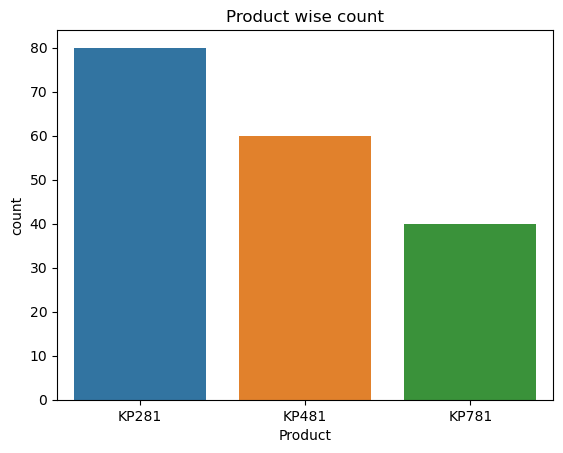

In [14]:
# Product column
sns.countplot(data = df, x = 'Product')
plt.title('Product wise count')

### Gender Column
#### Insight : 
     - Out of total user buying, ~58% of sales are from Males.
     - Unique values --> Male and Female
    
#### Recommendation:
    - Most of the Males prefer to buy treadmill and provides goodies for completion of particular miles. This will encourage user both Male and Females to use Treadmill frequency and even sales will increase.

In [15]:
# Marginal Probability
np.round(df['Gender'].value_counts(normalize = True)*100,2)

Male      57.78
Female    42.22
Name: Gender, dtype: float64

In [16]:
df['Gender'].unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

Text(0.5, 1.0, 'Gender wise count')

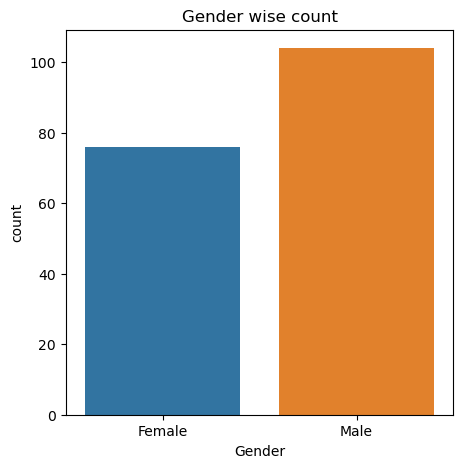

In [17]:
# Gender column
plt.figure(figsize = (5,5))
sns.countplot(data = df, x = 'Gender')
plt.title('Gender wise count')

### MaritalStatus Column
#### Insight : 
     - Out of total user buying, 59% of sales are from Partnered.
     - Unique values --> Partnered and Single.
    
#### Recommendation:
    - Most of the Partnered prefer to buy treadmill. So, if we provide discount of 2 treadmill who will purchase at same time. Partnered users can have 2 treadmill with discount on it. 

In [18]:
# Marginal Probability
np.round(df['MaritalStatus'].value_counts(normalize = True)*100,2)

Partnered    59.44
Single       40.56
Name: MaritalStatus, dtype: float64

In [19]:
df['MaritalStatus'].unique()

['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']

Text(0.5, 1.0, 'MaritalStatus wise count')

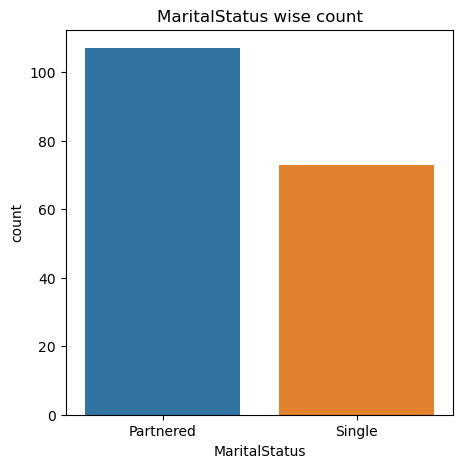

In [20]:
# MaritalStatus column
plt.figure(figsize = (5,5))
sns.countplot(data = df, x = 'MaritalStatus')
plt.title('MaritalStatus wise count')

### Countious data column - like Age, Education, Usage, Fitness, Income, Miles
Exploratory analysis done in above with describe() function

### Age column :
#### Insight : 
    - 32 are unique values in Age column out of 180 values
    - min ->18 and Max --> 50
    - Majority of sales are from range of 21 to 35 age
    - 25 age people prefer to purchase treadmill.
    - As per histogram, Data is not normal distribution and left sided plot
    - Data as few outliers
#### Recommendation:
    - From 21 to 35 age, user prefer to buy treadmill, Sales excutive can put more weightage on these age group - chancing of user purchasing will increase

In [21]:
# Age column number of unique value
df['Age'].nunique()

32

Text(0.5, 1.0, 'Age wise count')

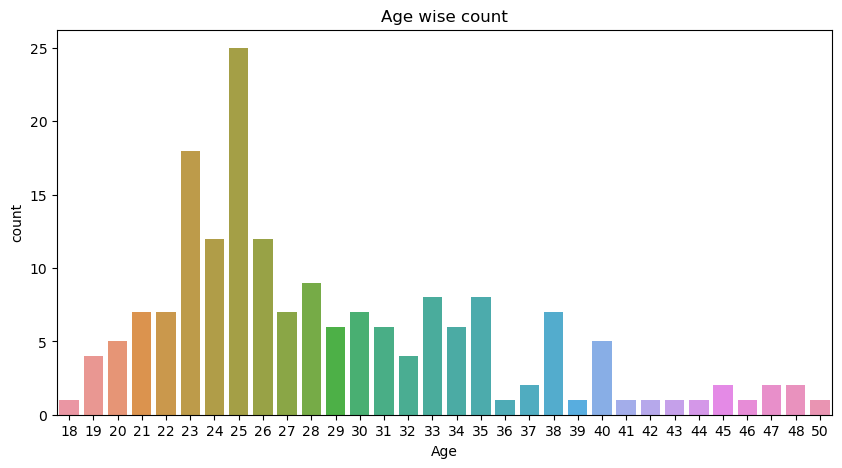

In [74]:
# Age column
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'Age')
plt.title('Age wise count')

Text(0.5, 1.0, 'Age wise count')

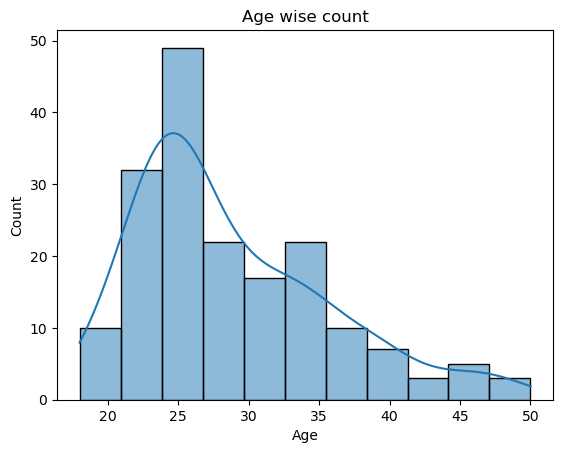

In [196]:
sns.histplot(data = df, x = 'Age', kde = True)
plt.title('Age wise count')

Text(0.5, 1.0, 'Age column analysis and outlier detection')

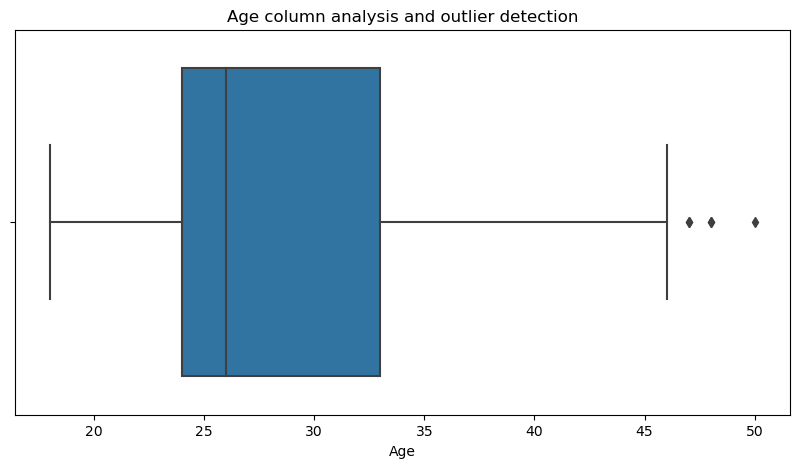

In [23]:
# Age column
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x = 'Age')
plt.title('Age column analysis and outlier detection')

### Education column :

#### Insight : 
    - 8 are unique values in Education column out of 180 values
    - min ->12 and Max --> 21
    - Majority of sales are from range of 14 to 18 years of education
    - 16 year of education people are the ones who bought most number of treadmills.
    - As per histogram, Data is not normal distribution.
    - Data as few outliers
#### Recommendation:
    - From 14 to 18 years of education, these user prefer to buy treadmill, Sales excutive can put more weightage on these years of education group - chancing of user purchasing will increase

In [24]:
# Education column number of unique value
df['Education'].nunique()

8

In [100]:
df['Education'].describe()

count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64

In [25]:
df['Education'].value_counts().reset_index().rename(columns = {'index' : 'Education', 'Education': 'count'})

,Education,count
0,16,85
1,14,55
2,18,23
3,15,5
4,13,5
5,12,3
6,21,3
7,20,1


Text(0.5, 1.0, 'Education wise count')

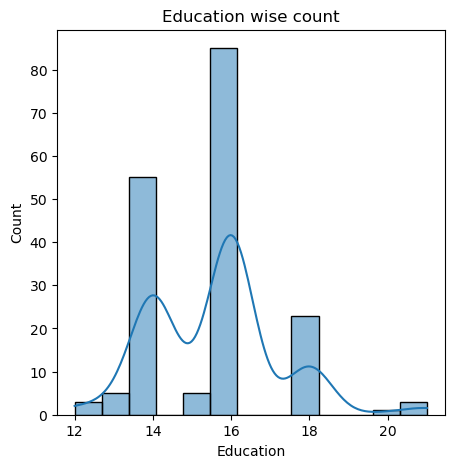

In [99]:
# Education column
plt.figure(figsize = (5,5))
sns.histplot(data = df, x = 'Education', kde = True)
plt.title('Education wise count')

Text(0.5, 1.0, 'Education column analysis and outlier detection')

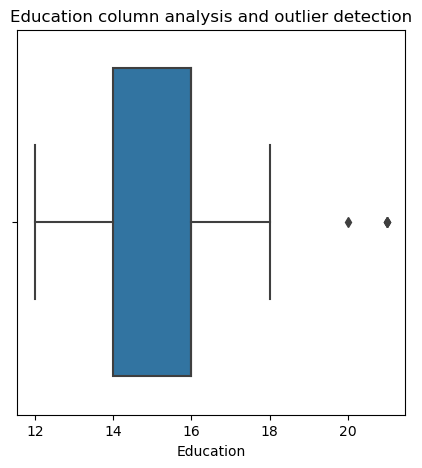

In [27]:
# Education column
plt.figure(figsize = (5,5))
sns.boxplot(data = df, x = 'Education')
plt.title('Education column analysis and outlier detection')

### Usage column :
#### Insight : 
    - 6 are unique values in Usage column out of 180 values
    - min ->2 and Max --> 7
    - Majority of sales are from range of 2 to 4 times/week.
    - Majority of users have usage of 3 times/week.
    - As per histogram, Data is not normal distribution.
    - Data as few outliers
#### Recommendation:
    - users have usage of 2-4 times/week, these user prefer to buy treadmill, Sales excutive can put more weightage on these group - chancing of user purchasing will increase

In [28]:
# Usage column number of unique value
df['Usage'].nunique()

6

In [101]:
df['Usage'].describe()

count    180.000000
mean       3.455556
std        1.084797
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Usage, dtype: float64

In [29]:
df['Usage'].value_counts().reset_index().rename(columns = {'index' : 'Usage', 'Usage': 'count'})

,Usage,count
0,3,69
1,4,52
2,2,33
3,5,17
4,6,7
5,7,2


Text(0.5, 1.0, 'Usage wise count')

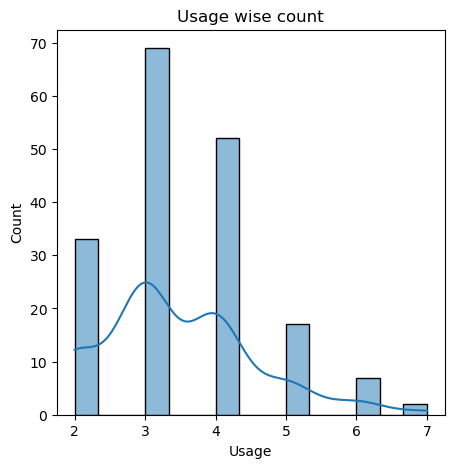

In [103]:
# Usage column
plt.figure(figsize = (5,5))
sns.histplot(data = df, x = 'Usage', kde = True)
plt.title('Usage wise count')

Text(0.5, 1.0, 'Usage column analysis and outlier detection')

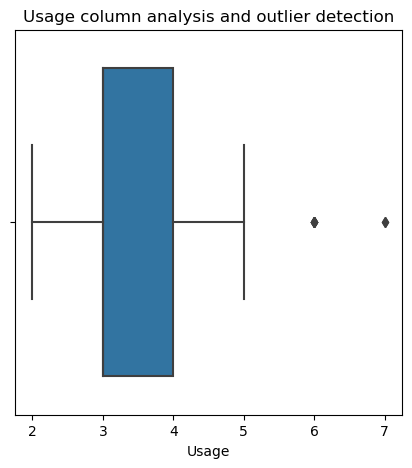

In [31]:
# Usage column
plt.figure(figsize = (5,5))
sns.boxplot(data = df, x = 'Usage')
plt.title('Usage column analysis and outlier detection')

### Fitness column :
#### Insight : 
    - 5 are unique values in Fitness column out of 180 values
    - min ->1 and Max --> 5
    - Majority of sales are from range of 2 to 5 Self-rated fitness.
    - Majority of users have usage of 3 Self-rated fitness.
    - As per histogram, Data is not normal distribution.
    - Data as few outliers
#### Recommendation:
    - users have 2 to 5 Self-rated fitness, these user prefer to buy treadmill, Sales excutive can put more weightage on these group - chancing of user purchasing will increase

In [32]:
# Fitness column number of unique value
df['Fitness'].nunique()

5

In [106]:
df['Fitness'].describe()

count    180.000000
mean       3.311111
std        0.958869
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Fitness, dtype: float64

In [33]:
df['Fitness'].value_counts().reset_index().rename(columns = {'index' : 'Fitness', 'Fitness': 'count'})

,Fitness,count
0,3,97
1,5,31
2,2,26
3,4,24
4,1,2


Text(0.5, 1.0, 'Fitness wise count')

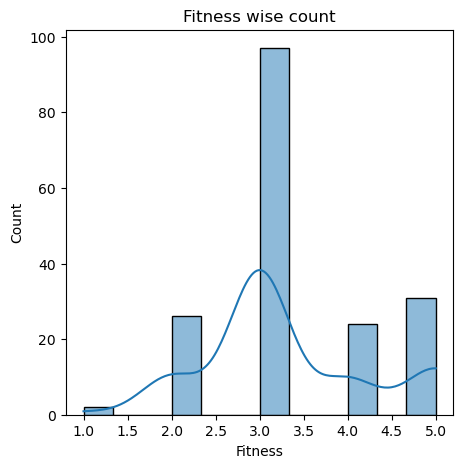

In [105]:
# Fitness column
plt.figure(figsize = (5,5))
sns.histplot(data = df, x = 'Fitness', kde = True)
plt.title('Fitness wise count')

Text(0.5, 1.0, 'Fitness column analysis and outlier detection')

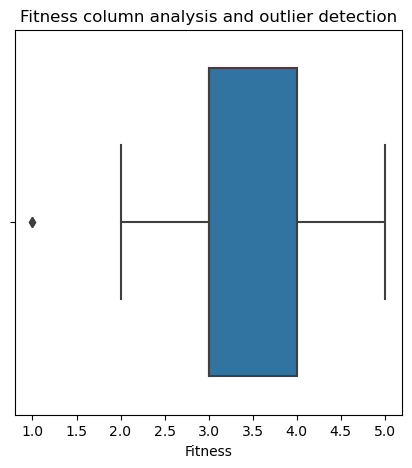

In [35]:
# Fitness column
plt.figure(figsize = (5,5))
sns.boxplot(data = df, x = 'Fitness')
plt.title('Fitness column analysis and outlier detection')

### Income column :
#### Insight : 
    - 62 are unique values in Income column out of 180 values
    - min ->$29562 and Max --> $104581
    - Majority of sales are from range of $30000 to $70000 income.
    - Most of users have $50,000 to $55,000 income at 35 users.
    - As per histogram, Data is not normal distribution.
    - Data as outliers
#### Recommendation:
    - Users who have $30000 to $70000 income, these user prefer to buy treadmill, Sales excutive can put more weightage on these group - chancing of user purchasing will increase
    - Users who have $50,000 to $55,000 income, will have highest probability of buying Treadmill

In [36]:
# Fitness column number of unique value
df['Income'].nunique()

62

In [108]:
df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

Text(0.5, 1.0, 'Income wise count')

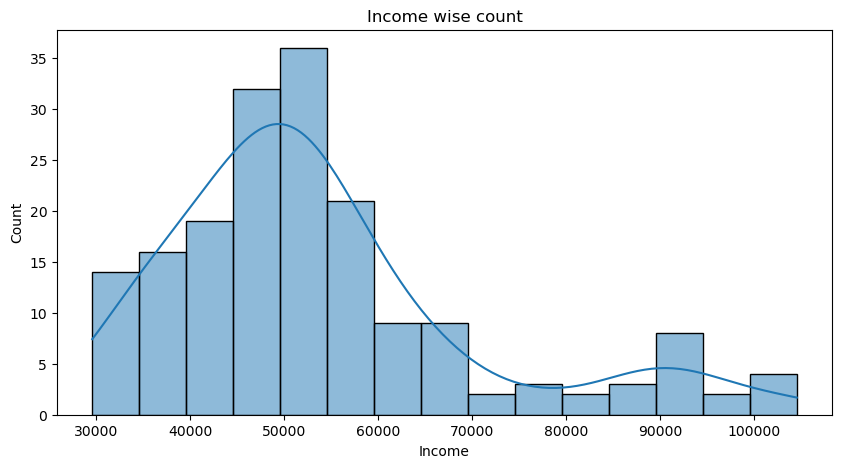

In [109]:
# Income column
plt.figure(figsize = (10,5))
sns.histplot(data = df, x = 'Income', kde= True)
plt.title('Income wise count')

Text(0.5, 1.0, 'Income column analysis and outlier detection')

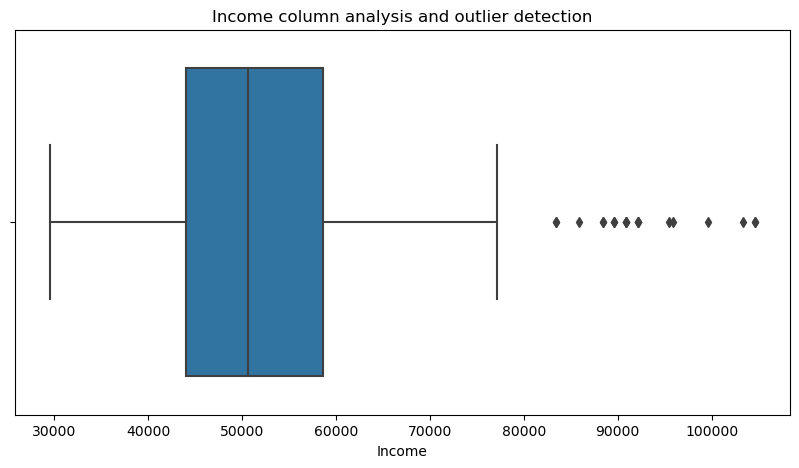

In [38]:
# Income column
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x = 'Income')
plt.title('Income column analysis and outlier detection')

### Miles column :
#### Insight : 
    - 37 are unique values in Miles column out of 180 values
    - min -> 21 Avg miles/week and Max --> 360 avg miles/week
    - Majority of sales are from range of 40 to 200 Avg miles/ week.
    - Most of users have 70 to 80 Avg miles/week of about 40 users.
    - As per histogram, Data is not normal distribution.
    - Data as outliers
#### Recommendation:
    - Users who have 40 to 200 Avg miles/ week, these user prefer to buy treadmill, Sales excutive can put more weightage on these group - chancing of user purchasing will increase
    - Users who have 70 to 80 Avg miles/week, will have highest probability of buying Treadmill

In [39]:
# Miles column number of unique value
df['Miles'].nunique()

37

In [110]:
df['Miles'].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

Text(0.5, 1.0, 'Miles wise count')

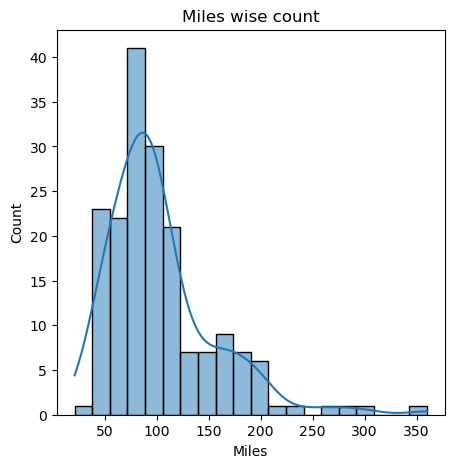

In [114]:
# Miles column
plt.figure(figsize = (5,5))
sns.histplot(data = df, x = 'Miles', kde = True)
plt.title('Miles wise count')

Text(0.5, 1.0, 'Miles column analysis and outlier detection')

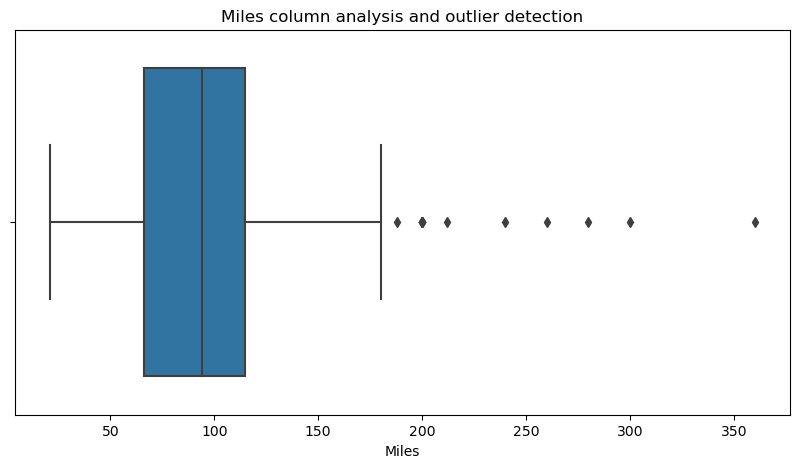

In [41]:
# Miles column
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x = 'Miles')
plt.title('Miles column analysis and outlier detection')

# Bivariate plot

### Bivariate analysis of Product wrt Gender and Maritalstatus
#### Insights : 
    - Gender Insights:
        - KP281 --> Both Male and Female user are equal who have purchased 
        - KP481 --> Male user are more compared to Female and with slight difference of 2 users
        - KP781 --> Male user are more compared to Female and with very large difference of 25+ users
    - Marital Status Insight:
        - In all product category, Partnered users are more.
#### Recommendataion:
    - Target Partnered users, when compared Single. Partnered users have high chance of buying Treadmill (~60%)
    - KP781, Target users will be Male and 82.5% purchased
    - KP281 and KP481 --> both male and female have equal chances of buying and equal weightage can be provided.

In [119]:
pd.crosstab(df['Product'],  df['Gender'])

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


In [120]:
# Probability of Male users, Given they use KP781 treadmill
(33/(33+7)) * 100

82.5

Text(0.5, 1.0, 'Product wise analysis wrt Gender')

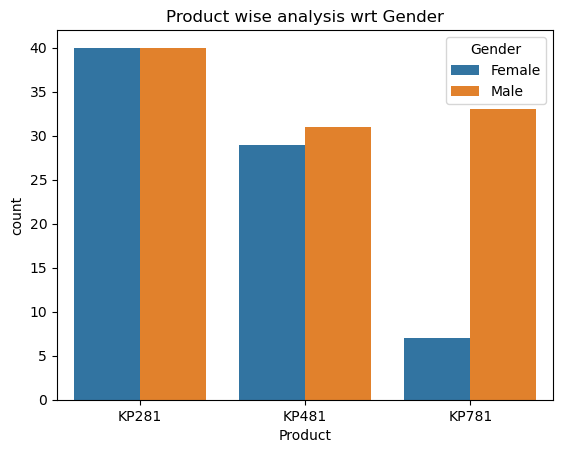

In [197]:
sns.countplot(data =df, x = 'Product', hue = 'Gender')
plt.title('Product wise analysis wrt Gender')

In [123]:
pd.crosstab(df['Product'],  [df['MaritalStatus']])

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


In [125]:
pd.crosstab(df['Product'],  [df['MaritalStatus']]).sum(axis = 0).reset_index().rename(columns = {0:'cnt'})

,MaritalStatus,cnt
0,Partnered,107
1,Single,73


In [126]:
# Percentage of share of partnered user 
(107/(107+73))*100

59.44444444444444

Text(0.5, 1.0, 'Product wise analysis wrt MaritalStatus')

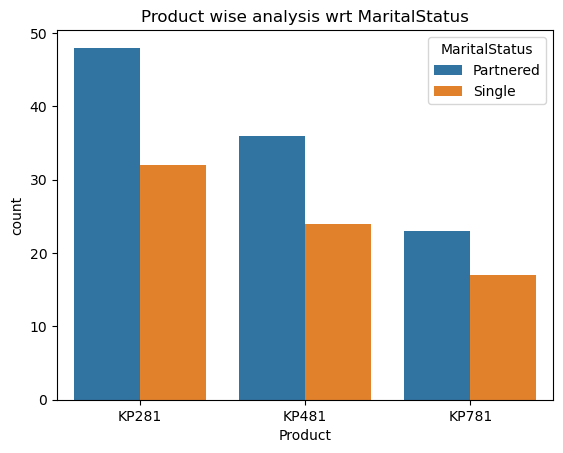

In [198]:
sns.countplot(data =df, x = 'Product', hue = 'MaritalStatus')
plt.title('Product wise analysis wrt MaritalStatus')

### Bivariate analsysis of below menttioned columns
Age, Education, Usage, Fitness, Income, Miles
##### Insights :
    - Product to Age analysis
        - KP281 and KP481 --> both age median are same.
        - KP781 --> 50% of users are between 25 to 30
    - Product to Education analysis
        - KP281 and KP481 --> Education below 16year, prefer to buy these product
        - KP781 --> Education above 16 year prefer to buy this product
    - Product to Usage analysis
        - KP281 --> Users prefer to use more treadmill by about 3 - 4 times/week
        - KP481 --> Least used product by users
        - KP781 --> Users prefer to use more treadmill when compared to others and there 25% is at 4 times/week
    - Product to Fitness analysis
        - KP281 & KP481 --> Moderate fitness users
        - KP781 --> Users have excellent shape when compared to others. Users are professional
    - Product to Income analysis
        - KP781 --> Higher income users prefer this Treadmill
    - Product to Miles analysis
        - KP781 --> User runs more miles in this treadmill (>=120 miles/week). User who plans to run/walk >= 120 miles/week prefer to buy this product.
        
#### Recommendation : 
    - KP781 --> Highter income (>= $60,000 on app.), Users who plans to run >= 12 miles/week, Professional users, Higher educated >=16 years and Gender = Male. Target these matching users as they have highter chances of buying this product.
    
    - KP481 --> Moderate income users ($45,000 to 53,000 app.), they prefer this product
    - KP281 --> Lower income ($40,000 to $53,000) users prefer this product, Female with Less usage 
    - KP281 and KP481 --> Education < 16, Fitness = 3, Both male and female prefer this product to buy

Text(0.5, 1.0, 'Product to Miles analysis')

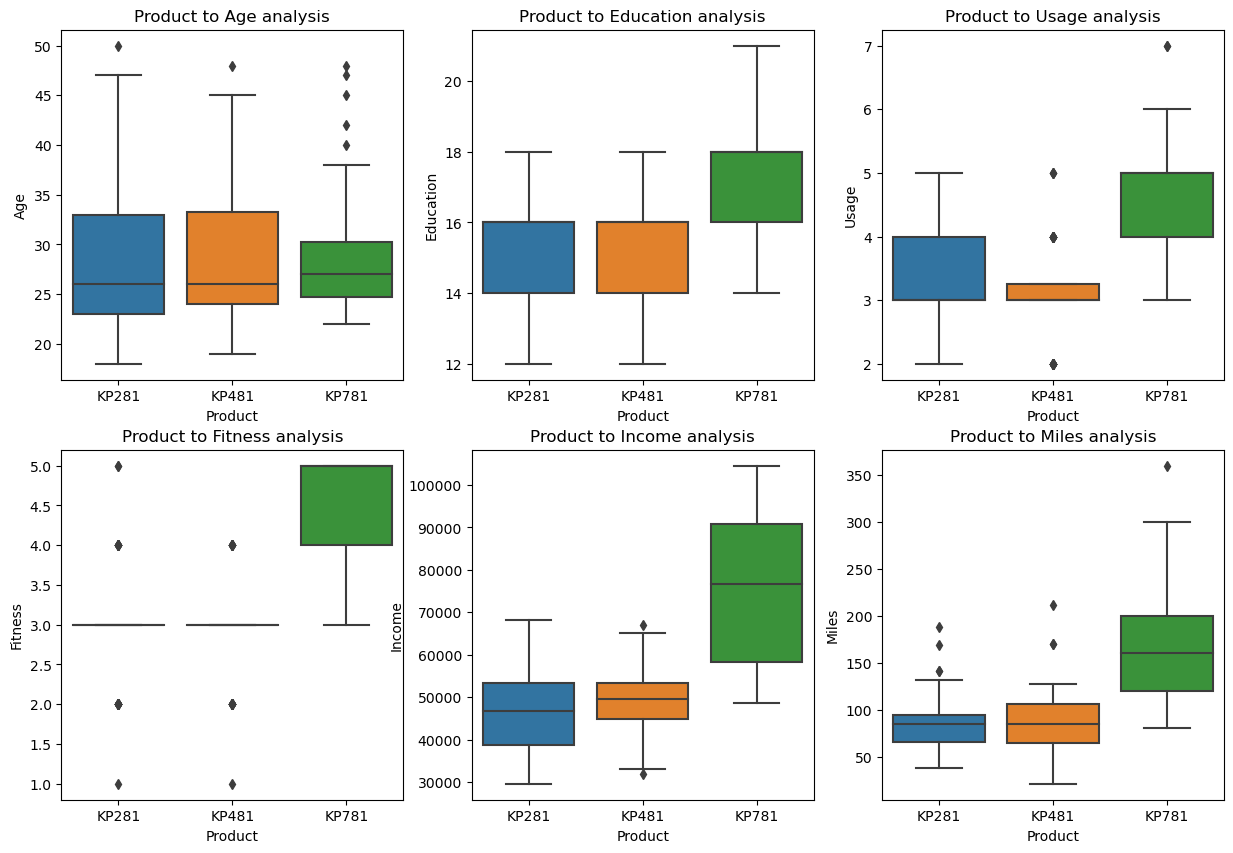

In [148]:
plt.figure(figsize = (15,10))

plt.subplot(2,3,1)
sns.boxplot(data = df, x = 'Product', y = 'Age')
plt.title('Product to Age analysis')

plt.subplot(2,3,2)
sns.boxplot(data = df, x = 'Product', y = 'Education')
plt.title('Product to Education analysis')

plt.subplot(2,3,3)
sns.boxplot(data = df, x = 'Product', y = 'Usage')
plt.title('Product to Usage analysis')

plt.subplot(2,3,4)
sns.boxplot(data = df, x = 'Product', y = 'Fitness')
plt.title('Product to Fitness analysis')

plt.subplot(2,3,5)
sns.boxplot(data = df, x = 'Product', y = 'Income')
plt.title('Product to Income analysis')

plt.subplot(2,3,6)
sns.boxplot(data = df, x = 'Product', y = 'Miles')
plt.title('Product to Miles analysis')

### Multivariate Analysis wrt Gender and each continous data column
continous data column - Age, Education, Usage, Fitness, Income, Miles

Text(0.5, 1.0, 'Product to Miles analysis')

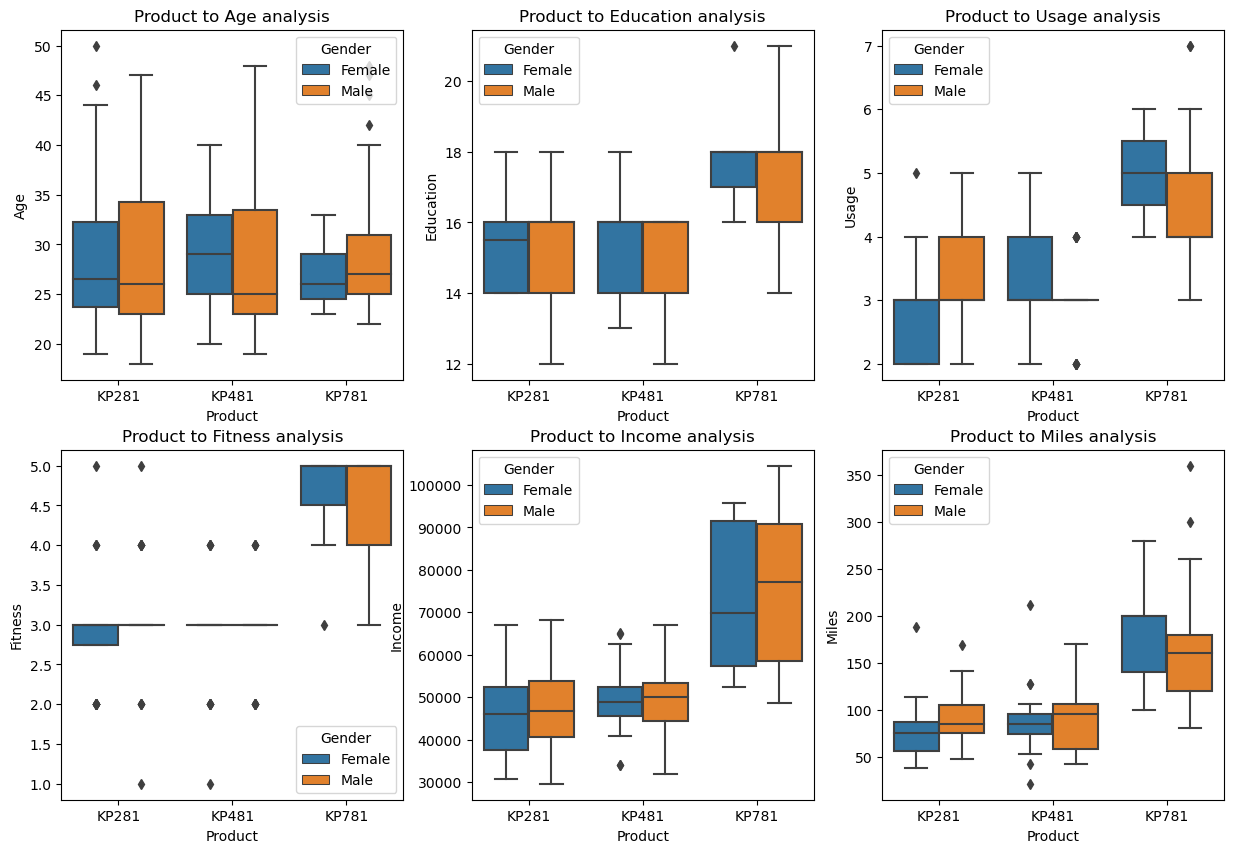

In [150]:
plt.figure(figsize = (15,10))

plt.subplot(2,3,1)
sns.boxplot(data = df, x = 'Product', y = 'Age', hue = 'Gender')
plt.title('Product to Age analysis')

plt.subplot(2,3,2)
sns.boxplot(data = df, x = 'Product', y = 'Education', hue = 'Gender')
plt.title('Product to Education analysis')

plt.subplot(2,3,3)
sns.boxplot(data = df, x = 'Product', y = 'Usage', hue = 'Gender')
plt.title('Product to Usage analysis')

plt.subplot(2,3,4)
sns.boxplot(data = df, x = 'Product', y = 'Fitness', hue = 'Gender')
plt.title('Product to Fitness analysis')

plt.subplot(2,3,5)
sns.boxplot(data = df, x = 'Product', y = 'Income', hue = 'Gender')
plt.title('Product to Income analysis')

plt.subplot(2,3,6)
sns.boxplot(data = df, x = 'Product', y = 'Miles',hue = 'Gender')
plt.title('Product to Miles analysis')

## Correlation
#### Insights : 
        - Fitness to miles runned are highly correlated.
        - Miles to usage are highly correlated.
        - Age to miles, fitness, usage are not correlated (almost tending to 0)
        
#### Recommendation :
    - User who are fit and they use treadmill more when compared to less fit users and they tend to cover more miles. Target KP781 model for these type of users

C:\Users\trtej\AppData\Local\Temp\ipykernel_10256\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

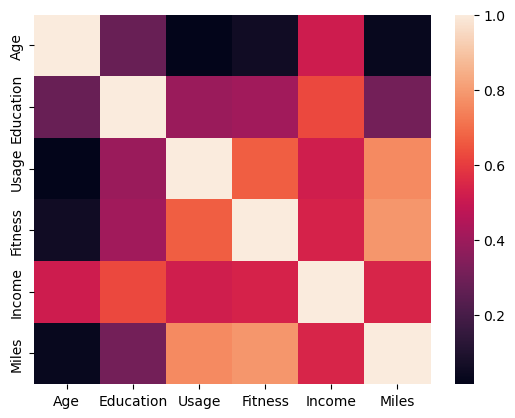

In [53]:
sns.heatmap(df.corr())

In [151]:
df.corr()

C:\Users\trtej\AppData\Local\Temp\ipykernel_10256\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


## Conditional Probabilities

### Given Gender,  what is probability of each product
    - P(KP281 | Male)
    - P(KP481 | Male)
    - P(KP781 | Male)

    - P(KP281 | Female)
    - P(KP481 | Female)
    - P(KP781 | Female)
    
#### Insights: 
    - Ovt of male who have purchased, probability of buying KP281 is higher and KP481, KP781 as almost of 29-30% probability
    - Ovt of female who have purchased, probability of buying KP281 is higher and Female wont prefer to purchase KP781 ( probability of 9.21%)

#### Recommendation : 
    - Target user are Male or Female, They tend to buy KP281 when compared to other products. 

In [157]:
df1 = pd.crosstab(df['Gender'],  [df['Product']])
df1

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [163]:
#  - P(KP281 | Male)
round(df1.loc['Male','KP281'] / df1.loc['Male'].sum()*100,2)

38.46

In [164]:
#  - P(KP481 | Male)
round(df1.loc['Male','KP481'] / df1.loc['Male'].sum()*100,2)

29.81

In [165]:
#  - P(KP781 | Male)
round(df1.loc['Male','KP781'] / df1.loc['Male'].sum()*100,2)

31.73

In [166]:
#  - P(KP281 | Female)
round(df1.loc['Female','KP281'] / df1.loc['Female'].sum()*100,2)

52.63

In [167]:
#  - P(KP481 | Female)
round(df1.loc['Female','KP481'] / df1.loc['Female'].sum()*100,2)

38.16

In [168]:
#  - P(KP781 | Female)
round(df1.loc['Female','KP781'] / df1.loc['Female'].sum()*100,2)

9.21

### Given Marital Status,  what is probability of each product
    - P(KP281 | partnered)
    - P(KP481 | partnered)
    - P(KP781 | partnered)

    - P(KP281 | Single)
    - P(KP481 | Single)
    - P(KP781 | Single)
    
#### Insights: 
    - Ovt of Partnered who have purchased, probability of buying KP281 is higher.
    - Ovt of Single who have purchased, probability of buying KP281 is higher 
    
#### Recommendation : 
    - Target user are Partnered or Single, They tend to buy KP281 when compared to other products. 

In [169]:
df2 = pd.crosstab(df['MaritalStatus'],  [df['Product']])
df2

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,48,36,23
Single,32,24,17


In [170]:
#  - P(KP281 | Partnered)
round(df2.loc['Partnered','KP281'] / df2.loc['Partnered'].sum()*100,2)

44.86

In [171]:
#  - P(KP481 | Partnered)
round(df2.loc['Partnered','KP481'] / df2.loc['Partnered'].sum()*100,2)

33.64

In [172]:
#  - P(KP781 | Partnered)
round(df2.loc['Partnered','KP781'] / df2.loc['Partnered'].sum()*100,2)

21.5

In [173]:
#  - P(KP281 | Single)
round(df2.loc['Single','KP281'] / df2.loc['Single'].sum()*100,2)

43.84

In [175]:
#  - P(KP481 | Single)
round(df2.loc['Single','KP481'] / df2.loc['Single'].sum()*100,2)

32.88

In [176]:
#  - P(KP781 | Single)
round(df2.loc['Single','KP781'] / df2.loc['Single'].sum()*100,2)

23.29

### Given Age Bins,  what is probability of each product
    - P(KP281 | Teen)
    - P(KP481 | Teen)
    - P(KP781 | Teen)

    - P(KP281 | Adult)
    - P(KP481 | Adult)
    - P(KP781 | Adult)
    
    - P(KP281 | Mid age and old age)
    - P(KP481 | Mid age and old age)
    - P(KP781 | Mid age and old age)
    
#### Insights: 
    - Majority users who have purchased, prefer to buy KP281. Then KP481 and KP781
    - KP781 users are of >40 age , with probability of 33%
    
#### Recommendation : 
    - Target user for KP281, Any age person
    - Target user for KP781, >40 age person

In [195]:
# Assuming Age < = 25 (Teen)
# Age <=40 (Adult)
# Age > 40 (Mid age and old age)

def age_bins(x):
    if x <= 25:
        return 'Teen'
    elif x <= 40:
        return 'Adult'
    elif x > 40:
        return 'Mid age and old age'
    
df3 = df[['Product','Age']].copy()  
df3['bins'] = df3['Age'].apply(lambda x : age_bins(x))

age_p = pd.crosstab(df3['bins'],  [df3['Product']])
age_p

Product,KP281,KP481,KP781
bins,,,
Adult,40,30,19
Mid age and old age,6,2,4
Teen,34,28,17


In [185]:
# p(KP281| Teen)
round(age_p.loc['Teen','KP281'] / age_p.loc['Teen'].sum()*100,2)

43.04

In [186]:
# p(KP481| Teen)
round(age_p.loc['Teen','KP481'] / age_p.loc['Teen'].sum()*100,2)

35.44

In [187]:
# p(KP781| Teen)
round(age_p.loc['Teen','KP781'] / age_p.loc['Teen'].sum()*100,2)

21.52

In [188]:
# p(KP281| Adult)
round(age_p.loc['Adult','KP281'] / age_p.loc['Adult'].sum()*100,2)

44.94

In [191]:
# p(KP481| Adult)
round(age_p.loc['Adult','KP481'] / age_p.loc['Adult'].sum()*100,2)

33.71

In [190]:
# p(KP781| Adult)
round(age_p.loc['Adult','KP781'] / age_p.loc['Adult'].sum()*100,2)

21.35

In [192]:
# p(KP281| Mid age and old age)
round(age_p.loc['Mid age and old age','KP281'] / age_p.loc['Mid age and old age'].sum()*100,2)

50.0

In [193]:
# p(KP481| Mid age and old age)
round(age_p.loc['Mid age and old age','KP481'] / age_p.loc['Mid age and old age'].sum()*100,2)

16.67

In [194]:
# p(KP781| Mid age and old age)
round(age_p.loc['Mid age and old age','KP781'] / age_p.loc['Mid age and old age'].sum()*100,2)

33.33

In [82]:
age_p = pd.crosstab(df['Product'],  [df['Age']]).sum(axis = 1).reset_index().rename(columns = {0 : 'age_count'})
age_p

,Product,age_count
0,KP281,80
1,KP481,60
2,KP781,40
